## featureCounts from Rsubread package to generate counts matrix

# I. Generating featureCounts Matrices

code to install Rsubread 

```BiocManager::install("Rsubread") ```

only need to install once, then just load everytime

In [18]:
library(Rsubread)
library(tidyverse)
library(DESeq2)
library(EnhancedVolcano)
library(dplyr)
library(data.table)

following [example script](https://www.rdocumentation.org/packages/Rsubread/versions/1.22.2/topics/featureCounts)

first need to create a variable that contains all of the SAM files for input of featureCounts

In [3]:
# setting variable files to include all SAM files
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/sam_files')
files <- c('2018--BBB-WBO-B21-CV_alignment.sam','2018--BPO-BPO-O16-CV_alignment.sam','2018--WBR-BBY-W25-CV_alignment.sam',
'2018--BBB-WBV-B70-CV_alignment.sam',  '2018--BPR-BPG-O38-CV_alignment.sam',  '2018--WBV-WBO-W23-CV_alignment.sam',
'2018--BBO-BBO-B16-CV_alignment.sam',  '2018--BPR-BPR-O02-CV_alignment.sam',  '2018--WBV-WBR-W12-CV_alignment.sam',
'2018--BBO-BBY-B27-CV_alignment.sam',  '2018--BPY-BPG-O42-CV_alignment.sam',  '2018--WBY-BBV-W65-CV_alignment.sam',
'2018--BBO-WBO-B16-CV_alignment.sam',  '2018--BPY-BPY-O29-CV_alignment.sam',  '2018--WBY-BBY-W30-CV_alignment.sam',
'2018--BBO-WBV-B64-CV_alignment.sam',  '2018--WBB-WBV-W69-CV_alignment.sam',  '2018--WPB-BPG-G45-CV_alignment.sam',
'2018--BBR-BBB-B50-CV_alignment.sam',  '2018--WBG-BBB-W56-CV_alignment.sam',  '2018--WPO-BPO-G16-CV_alignment.sam',
'2018--BBR-BBG-B38-CV_alignment.sam',  '2018--WBG-WBG-W44-CV_alignment.sam',  '2018--WPO-BPY-G28-CV_alignment.sam',
'2018--BBR-BBY-B26-CV_alignment.sam',  '2018--WBO-BBR-W03-CV_alignment.sam',  '2018--WPR-BPY-G25-CV_alignment.sam',
'2018--BBY-WBG-B42-CV_alignment.sam',  '2018--WBO-WBV-W64-CV_alignment.sam',  '2018--WPV-BPR-G11-CV_alignment.sam')
gtf_file <- "/project/pi_sarah_gignouxwolfsohn_uml_edu/Reference_genomes/genomic.gtf"

I was getting an error in my featureCounts script for a while about it not being able to read the 9th column to find gene_id, even though it was there. After some googling, found out that featureCounts will not work if there are empty entries for gene_id - have to remove any row that doesn't have an input for gene_id

#### removing rows that don't have gene_id entries 
**RUN THIS CODE IN COMMAND LINE**

```grep 'gene_id ""' genomic.gtf ```

```grep -v 'gene_id ""' genomic.gtf > fixed_CV_annotation.gtf```

In [4]:
# now resetting gtf_file variable
gtf_file <- "/project/pi_sarah_gignouxwolfsohn_uml_edu/Reference_genomes/fixed_CV_annotation.gtf"

#### featureCounts on Meta-Features

running actual featureCounts function on SAM files - counts for meta-features (e.g. genes)

can skip the two code blocks that actually run featureCounts -> since now we have the files and can just read them in

In [4]:
## CAN SKIP AFTER FIRST TIME RUNNING ##
counts <- featureCounts(files, # SAM or BAM format - automatically detects
              
              # annotation
              annot.ext = gtf_file, # input of annotation GTF file
              isGTFAnnotationFile=TRUE, # input of annotation file is in GTF format
              GTF.featureType="exon", # feature type used to select rows in GTF annotation
              #GTF.attrType="gene_id", # group features (e.g. exons) into meta-features (e.g. genes)
              
              # level of summarization
              useMetaFeatures=TRUE, # read summarization performed at meta-feature level
              # if FALSE, read summarization performed at feature level (e.g. exons)
              
              # parameters specific to paired end reads
              isPairedEnd=TRUE,
              countChimericFragments=TRUE,
              autosort=TRUE)


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
       Rsubread 2.16.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 30 SAM files                                     ||
||                                                                            ||
||                           2018--BBB-WBO-B21-CV_alignment.sam               ||
||                           2018--BPO-BPO-O16-CV_alignment.sam               ||
||                           2018--WBR-BBY-W25-CV_al

generally get about 50% of reads that match up to gene names for each sample

writing results to text file

In [5]:
## again can skip after running the first time ##
write.table(
  x=data.frame(counts$annotation[,c("GeneID","Length")],
    counts$counts,
    stringsAsFactors=FALSE),
  file="counts.txt",
  quote=FALSE,
  sep="\t",
  row.names=FALSE)

reading in the text file and checking how it looks

In [22]:
metaf_counts <- read.table('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/sam_files/fc_counts.txt', header=TRUE)
dim(metaf_counts) # 38,828 genes total
head(metaf_counts)

[1] 38828    32

,GeneID,Length,X2018..BBB.WBO.B21.CV_alignment.sam,X2018..BPO.BPO.O16.CV_alignment.sam,X2018..WBR.BBY.W25.CV_alignment.sam,X2018..BBB.WBV.B70.CV_alignment.sam,X2018..BPR.BPG.O38.CV_alignment.sam,X2018..WBV.WBO.W23.CV_alignment.sam,X2018..BBO.BBO.B16.CV_alignment.sam,X2018..BPR.BPR.O02.CV_alignment.sam,⋯,X2018..WPO.BPO.G16.CV_alignment.sam,X2018..BBR.BBG.B38.CV_alignment.sam,X2018..WBG.WBG.W44.CV_alignment.sam,X2018..WPO.BPY.G28.CV_alignment.sam,X2018..BBR.BBY.B26.CV_alignment.sam,X2018..WBO.BBR.W03.CV_alignment.sam,X2018..WPR.BPY.G25.CV_alignment.sam,X2018..BBY.WBG.B42.CV_alignment.sam,X2018..WBO.WBV.W64.CV_alignment.sam,X2018..WPV.BPR.G11.CV_alignment.sam
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,LOC111116054,118,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
2,LOC111126949,2254,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,LOC111110729,2083,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,LOC111112434,1023,0,0,0,0,0,0,0,2,⋯,0,0,0,0,0,0,0,0,0,0
5,LOC111120752,1070,2,1,0,2,0,0,0,2,⋯,0,0,0,1,1,0,1,0,1,0
6,LOC111128944,1773,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


looks like this is counts for meta-features and not features -> because of this:

Features : 726075                                                       ||
Meta-features : 38828

doing this for features instead of meta-features - had accidentally set useMetaFeatures=FALSE

#### featureCounts on Features

In [6]:
## again can skip after running for the first time ##
counts_features <- featureCounts(files, # SAM or BAM format - automatically detects
              
              # annotation
              annot.ext = gtf_file, # input of annotation GTF file
              isGTFAnnotationFile=TRUE, # input of annotation file is in GTF format
              GTF.featureType="exon", # feature type used to select rows in GTF annotation
              #GTF.attrType="gene_id", # group features (e.g. exons) into meta-features (e.g. genes)
              
              # level of summarization
              useMetaFeatures=FALSE, # read summarization performed at meta-feature level
              # if FALSE, read summarization performed at feature level (e.g. exons)
              
              # parameters specific to paired end reads
              isPairedEnd=TRUE,
              countChimericFragments=TRUE,
              autosort=TRUE)


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
       Rsubread 2.16.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 30 SAM files                                     ||
||                                                                            ||
||                           2018--BBB-WBO-B21-CV_alignment.sam               ||
||                           2018--BPO-BPO-O16-CV_alignment.sam               ||
||                           2018--WBR-BBY-W25-CV_al

In [19]:
head(counts_features)

In [35]:
head(counts_features$annotation)

,GeneID,Chr,Start,End,Strand,Length
,<chr>,<chr>,<int>,<int>,<chr>,<int>
1,LOC111116054,NC_035780.1,13578,13603,+,26
2,LOC111116054,NC_035780.1,14237,14290,+,54
3,LOC111116054,NC_035780.1,14557,14594,+,38
4,LOC111126949,NC_035780.1,28961,29073,+,113
5,LOC111126949,NC_035780.1,30524,31557,+,1034
6,LOC111126949,NC_035780.1,31736,31887,+,152


In [12]:
gtf <- read.csv(gtf_file)

head(gtf)

,X.gtf.version.2.2
,<chr>
1,#!genome-build C_virginica-3.0
2,#!genome-build-accession NCBI_Assembly:GCF_002022765.2
3,#!annotation-source NCBI Crassostrea virginica Annotation Release 100
4,NC_035780.1 Gnomon gene 13578 14594 . + . gene_id LOC111116054; db_xref GeneID:111116054; gbkey Gene; gene LOC111116054; gene_biotype lncRNA;
5,"NC_035780.1 Gnomon exon 13578 13603 . + . gene_id LOC111116054; transcript_id XR_002636969.1; db_xref GeneID:111116054; gbkey ncRNA; gene LOC111116054; model_evidence Supporting evidence includes similarity to: 100% coverage of the annotated genomic feature by RNAseq alignments, including 1 sample with support for all annotated introns; product uncharacterized LOC111116054; exon_number 1;"
6,"NC_035780.1 Gnomon exon 14237 14290 . + . gene_id LOC111116054; transcript_id XR_002636969.1; db_xref GeneID:111116054; gbkey ncRNA; gene LOC111116054; model_evidence Supporting evidence includes similarity to: 100% coverage of the annotated genomic feature by RNAseq alignments, including 1 sample with support for all annotated introns; product uncharacterized LOC111116054; exon_number 2;"


In [36]:
# can skip after running for the first time
# writes the output of featureCounts into a txt file in the directory
write.table(
  x=data.frame(counts_features$annotation[,c("GeneID", "Chr","Length")],
    counts_features$counts,
    stringsAsFactors=FALSE),
  file="fc_feature_counts.txt",
  quote=FALSE,
  sep="\t",
  row.names=FALSE)

In [ ]:
# reading in the txt file as a data frame
feature_counts <- read.table('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/sam_files/fc_feature_counts.txt', header=TRUE)
dim(feature_counts) # 726,075 features total
head(feature_counts)

## side quest - exons
Adding this section 10/24/2024

we want to know more information about methylation and exons in this analysis. I had done featureCounts on exons, but didn't do any downstream analysis because you have to have unique rownames for DESeq2, and since there can be multiple exons per gene, there are multiple rows with the same accession number. But this genereated counts matrix is not useless - I'm going to use this to quantify the amount of exons per gene, and methylation per exon. 

In [23]:
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/exons')

# Write results to counts.txt
write.table(
  counts_features,
  file = "counts.txt",
  row.names = FALSE,
  quote = FALSE,
  sep = "\t"
)

In [72]:
counts <- read.table('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/exons/fc_feature_counts.txt', header = TRUE)
counts <- counts[grepl("LOC", counts$GeneID), ]
head(counts)

,GeneID,Chr,Length,X2018..BBB.WBO.B21.CV_alignment.sam,X2018..BPO.BPO.O16.CV_alignment.sam,X2018..WBR.BBY.W25.CV_alignment.sam,X2018..BBB.WBV.B70.CV_alignment.sam,X2018..BPR.BPG.O38.CV_alignment.sam,X2018..WBV.WBO.W23.CV_alignment.sam,X2018..BBO.BBO.B16.CV_alignment.sam,⋯,X2018..WPO.BPO.G16.CV_alignment.sam,X2018..BBR.BBG.B38.CV_alignment.sam,X2018..WBG.WBG.W44.CV_alignment.sam,X2018..WPO.BPY.G28.CV_alignment.sam,X2018..BBR.BBY.B26.CV_alignment.sam,X2018..WBO.BBR.W03.CV_alignment.sam,X2018..WPR.BPY.G25.CV_alignment.sam,X2018..BBY.WBG.B42.CV_alignment.sam,X2018..WBO.WBV.W64.CV_alignment.sam,X2018..WPV.BPR.G11.CV_alignment.sam
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,LOC111116054,NC_035780.1,26,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
2,LOC111116054,NC_035780.1,54,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,LOC111116054,NC_035780.1,38,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,LOC111126949,NC_035780.1,113,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,LOC111126949,NC_035780.1,1034,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,LOC111126949,NC_035780.1,152,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [38]:
# Count exons per gene
exon_counts_dt <- counts %>%
  group_by(GeneID, Chr) %>%
  summarise(exon_count = n())

exon_counts_dt

`summarise()` has grouped output by 'GeneID'. You can override using the
`.groups` argument.


GeneID,Chr,exon_count
<chr>,<chr>,<int>
LOC111099029,NC_035780.1,33
LOC111099030,NC_035780.1,4
LOC111099031,NC_035784.1,28
LOC111099032,NC_035784.1,2
LOC111099033,NC_035780.1,12
LOC111099034,NC_035784.1,4
LOC111099035,NC_035784.1,20
LOC111099036,NC_035784.1,12
LOC111099037,NC_035784.1,2


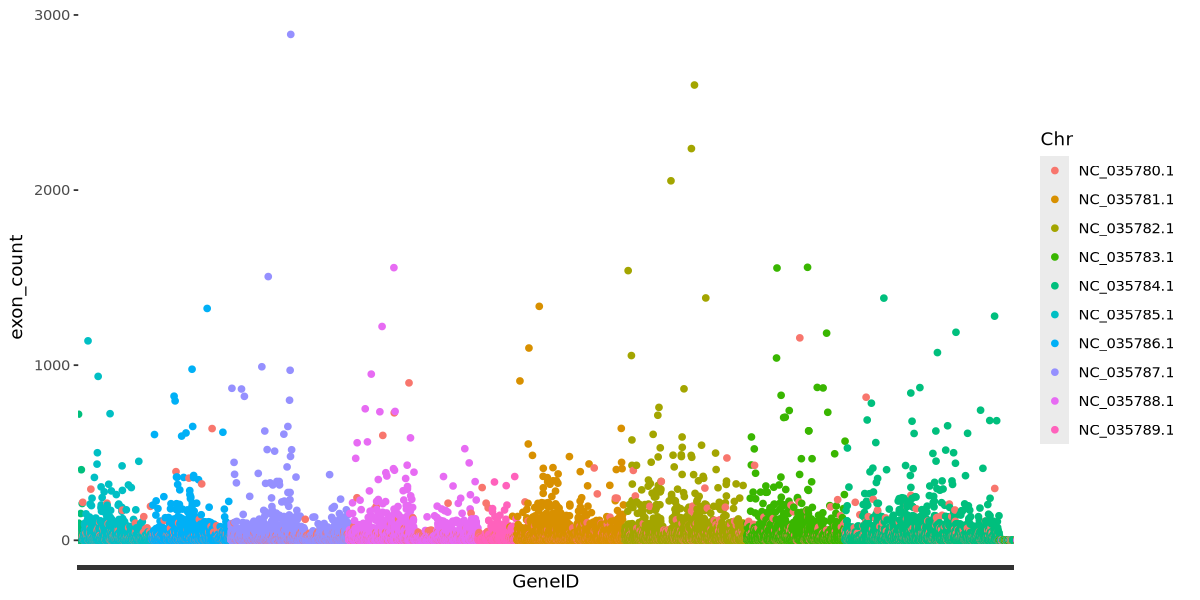

In [73]:
options(repr.plot.width=10, repr.plot.height=5)

ggplot(exon_counts_dt, aes(x=GeneID, y=exon_count, col = Chr)) +
geom_point() +
theme(axis.text.x=element_blank())

#### What percent of exons are methylated? Does this change with treatment? 

In [74]:
# remove rows with low counts
dim(counts)

counts2 <- counts[,-3]

counts2 <- counts2[-which(rowSums(counts2[sapply(counts2, is.numeric)]) < 10),]
dim(counts2)

[1] 725464     33

[1] 21201    32

In [75]:
total_exon <- 725464

removed ~704,833 rows that had less than 10 sequences total

In [77]:
(21201/total_exon)*100

[1] 2.922406

3% of exons are methylated?? is that what that means?

In [55]:
# read in meta data of samples
meta_data <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/CV_CE18_meta.csv')
head(meta_data)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O,hypoxic,control
2,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V,hypoxic,control
3,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O,hypoxic,hypoxic
4,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y,hypoxic,hypoxic
5,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O,hypoxic,control
6,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V,hypoxic,control


In [78]:
# cleaning up the column names of feature_counts 
# code generated with ChatGPT

# removing the extra info from the file name
cleaned_column_names <- gsub("^X2018\\.\\.", "", gsub("\\.CV_alignment\\.sam$", "", colnames(counts2)))
head(cleaned_column_names)

# replace the '.' with '-'
cleaned_column_names2 <- gsub('\\.', "-", cleaned_column_names)
head(cleaned_column_names2)

# now assigning to the columns
colnames(counts2) = cleaned_column_names2
head(counts2)

[1] "GeneID"      "Chr"         "BBB.WBO.B21" "BPO.BPO.O16" "WBR.BBY.W25"
[6] "BBB.WBV.B70"

[1] "GeneID"      "Chr"         "BBB-WBO-B21" "BPO-BPO-O16" "WBR-BBY-W25"
[6] "BBB-WBV-B70"

,GeneID,Chr,BBB-WBO-B21,BPO-BPO-O16,WBR-BBY-W25,BBB-WBV-B70,BPR-BPG-O38,WBV-WBO-W23,BBO-BBO-B16,BPR-BPR-O02,⋯,WPO-BPO-G16,BBR-BBG-B38,WBG-WBG-W44,WPO-BPY-G28,BBR-BBY-B26,WBO-BBR-W03,WPR-BPY-G25,BBY-WBG-B42,WBO-WBV-W64,WPV-BPR-G11
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
18,LOC111120752,NC_035780.1,2,1,0,2,0,0,0,2,⋯,0,0,0,1,0,0,1,0,1,0
68,LOC111109452,NC_035780.1,0,1,0,0,0,0,0,0,⋯,0,12,0,0,0,0,3,2,7,0
75,LOC111124802,NC_035780.1,27,2,5,52,9,10,13,3,⋯,8,18,7,2,5,1,1,9,20,0
80,LOC111124802,NC_035780.1,177,17,23,134,50,27,102,5,⋯,24,64,17,17,42,9,84,41,72,2
95,LOC111124802,NC_035780.1,28,6,16,16,26,21,49,6,⋯,19,49,4,0,51,1,21,12,33,3
97,LOC111101273,NC_035780.1,173,15,43,146,83,45,115,16,⋯,52,115,49,38,137,8,73,45,143,1


In [79]:
length(colnames(counts2)) #31
length(rownames(meta_data)) #30
# number of columns in feature_counts != number of rows in meta_data

[1] 32

[1] 30

In [59]:
head(meta_data)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O,hypoxic,control
2,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V,hypoxic,control
3,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O,hypoxic,hypoxic
4,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y,hypoxic,hypoxic
5,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O,hypoxic,control
6,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V,hypoxic,control


In [62]:
rownames(meta_data) <- meta_data$unique_ID

In [63]:
# hypoxic control
HC_meta <- filter(meta_data, meta_data$Phase1 == 'hypoxic' & meta_data$Phase2 == 'control')

# hypoxic hypoxic 
HH_meta <- filter(meta_data, meta_data$Phase1 == 'hypoxic' & meta_data$Phase2 == 'hypoxic')

# control hypoxic 
CH_meta <- filter(meta_data, meta_data$Phase1 == 'control' & meta_data$Phase2 == 'hypoxic')

# control control
CC_meta <- filter(meta_data, meta_data$Phase1 == 'control' & meta_data$Phase2 == 'control')


In [83]:
# hypoxic control methylation in exons
HC_counts <- counts2[, colnames(counts2) %in% rownames(HC_meta)]

# removing exons that have less than 1 sequence per sample
HC_counts <- HC_counts[-which(rowSums(HC_counts[sapply(HC_counts, is.numeric)]) < 5),]

head(HC_counts)
(dim(HC_counts)[1]/total_exon)*100


,BBB-WBO-B21,BBB-WBV-B70,BBO-WBO-B16,BBO-WBV-B64,BBY-WBG-B42
,<int>,<int>,<int>,<int>,<int>
18,2,2,2,0,0
75,27,52,28,34,9
80,177,134,193,164,41
95,28,16,28,15,12
97,173,146,171,158,45
125,7,65,17,38,0


[1] 2.30101

In [84]:
# hypoxic hypoxic methylation in exons
HH_counts <- counts2[, colnames(counts2) %in% rownames(HH_meta)]

# removing exons that have less than 1 sequence per sample
HH_counts <- HH_counts[-which(rowSums(HH_counts[sapply(HH_counts, is.numeric)]) < 5),]

head(HH_counts)
(dim(HH_counts)[1]/total_exon)*100


,BBO-BBO-B16,BBO-BBY-B27,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26
,<int>,<int>,<int>,<int>,<int>
68,0,0,10,12,0
75,13,5,15,18,5
80,102,59,51,64,42
95,49,18,24,49,51
97,115,75,64,115,137
125,20,20,24,1,18


[1] 2.2518

In [85]:
# control hypoxic methylation in exons
CH_counts <- counts2[, colnames(counts2) %in% rownames(CH_meta)]

# removing exons that have less than 1 sequence per sample
CH_counts <- CH_counts[-which(rowSums(CH_counts[sapply(CH_counts, is.numeric)]) < 5),]

head(CH_counts)
(dim(CH_counts)[1]/total_exon)*100


,WBR-BBY-W25,WBY-BBV-W65,WBY-BBY-W30,WBG-BBB-W56,WBO-BBR-W03
,<int>,<int>,<int>,<int>,<int>
75,5,12,9,36,1
80,23,56,41,87,9
95,16,70,34,65,1
97,43,87,81,127,8
125,4,21,22,22,0
129,63,132,89,137,15


[1] 2.101

In [86]:
# control control methylation in exons
CC_counts <- counts2[, colnames(counts2) %in% rownames(CC_meta)]

# removing exons that have less than 1 sequence per sample
CC_counts <- CC_counts[-which(rowSums(CC_counts[sapply(CC_counts, is.numeric)]) < 5),]

head(CC_counts)
(dim(CC_counts)[1]/total_exon)*100


,WBV-WBO-W23,WBV-WBR-W12,WBB-WBV-W69,WBG-WBG-W44,WBO-WBV-W64
,<int>,<int>,<int>,<int>,<int>
68,0,0,0,0,7
75,10,1,39,7,20
80,27,14,104,17,72
95,21,5,49,4,33
97,45,18,132,49,143
125,15,1,0,7,27


[1] 2.155862

In [88]:
mean_methyl_exon <- c((2.23+2.3)/2, (2.10+2.16)/2)

mean_methyl_exon

[1] 2.265 2.130

In [89]:
t.test(mean_methyl_exon)


	One Sample t-test

data:  mean_methyl_exon
t = 32.556, df = 1, p-value = 0.01955
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 1.339831 3.055169
sample estimates:
mean of x 
   2.1975 


slightly higher methylation of exons in samples that experienced hypoxia in their first exposure compared to those that experienced control for first exposure - but these counts aren't normalized yet - could be a result in sequencing coverage/depth